In [1]:
# for pandas

import sys
sys.path.append('/home/hyeseon/venv/venv_nsmc/lib/python3.6/site-packages')

In [2]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# 1. 데이터 분석 및 전처리

## 1-1) 데이터 로드하기

In [3]:
DATA_IN_PATH = './data/'
fname_train = 'ratings_train.txt'
fname_test = 'ratings_test.txt'

fpath_train = os.path.join(DATA_IN_PATH, fname_train)
fpath_test = os.path.join(DATA_IN_PATH, fname_test)

In [4]:
train_data = pd.read_table(fpath_train)
test_data = pd.read_table(fpath_test)

In [5]:
print("학습용 리뷰 개수 : ", len(train_data))
print("평가용 리뷰 개수 : ", len(test_data))

학습용 리뷰 개수 :  150000
평가용 리뷰 개수 :  50000


In [6]:
train_data.head(5)
# train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [7]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [8]:
test_data.columns

Index(['id', 'document', 'label'], dtype='object')

In [9]:
train_data.describe()

,id,label
count,1.500000e+05,150000.000000
mean,6.743533e+06,0.498847
std,2.919051e+06,0.500000
min,3.300000e+01,0.000000
25%,4.766881e+06,0.000000
50%,7.526840e+06,0.000000
75%,9.249435e+06,1.000000
max,1.027815e+07,1.000000


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


## 1-2) 데이터 정제하기

In [12]:
# 중복을 제거한 샘플 수
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [13]:
train_data.drop_duplicates(subset=['document'], inplace=True)
print(len(train_data))

146183


In [14]:
test_data['document'].nunique() # 중복을 제거한 샘플 수

49157

In [15]:
train_data.sort_values(by='document')

,id,document,label
20014,181912,!,1
56535,5124632,! 20점을주고싶네요! 한번보고 두번봐도 자꾸만보고싶네,0
79716,10275819,!!! 강추. 마지막..ㅋㅋ 유후,1
70360,304413,!!!!!,1
149364,8014701,!!!!!!,1
...,...,...,...
88138,3292748,힝힝 정말 멋졌써,1
139894,7006620,盧미오 라서 빨갱이盧,1
83339,6836838,綠林의 무리들이 험악한 江湖를 떠나 고고학의 세계에서 유유자적하는 당대 최고 고수의...,0
77983,8875871,紐⑦넗濡쒕씪異⑹쟾濡,0


In [16]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  73342
1      1  72841


<AxesSubplot:>

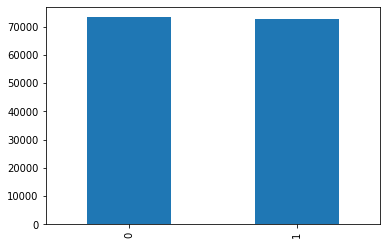

In [17]:
train_data['label'].value_counts().plot(kind='bar')

In [18]:
print(train_data.isnull().values.any())

True


In [19]:
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [20]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [21]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [22]:
print(len(train_data))

146182


In [23]:
text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
re.sub(r'[^a-zA-Z ]', '', text) #알파벳과 공백을 제외하고 모두 제거

'do you expect people to read the FAQ etc and actually accept hard atheism'

In [24]:
# 한글과 공백을 제외하고 모두 제거
train_data['document'] = train_data['document'].str.replace(
                                            "[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [25]:
# white space 데이터를 empty value로 변경
train_data['document'] = train_data['document'].str.replace(
                                                        '^ +', "") 

train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    789
label         0
dtype: int64


In [26]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [27]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

145393


In [28]:
# document 열에서 중복인 내용이 있다면 중복 제거
test_data.drop_duplicates(subset = ['document'], inplace=True)

# 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 공백은 empty 값으로 변경
test_data['document'] = test_data['document'].str.replace('^ +', "")

# 공백은 Null 값으로 변경
test_data['document'].replace('', np.nan, inplace=True)

# Null 값 제거
test_data = test_data.dropna(how='any') 
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


In [29]:
train_data['label'].value_counts()

0    73043
1    72350
Name: label, dtype: int64

In [30]:
test_data['label'].value_counts()

1    24520
0    24332
Name: label, dtype: int64

### 데이터 분석

In [31]:
# 각 데이터의 리뷰 길이 확인
train_length=train_data['document'].astype(str).apply(len)
train_length.head()

0    17
1    26
2    17
3    25
4    60
Name: document, dtype: int64

/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


Text(0, 0.5, 'Number of review')

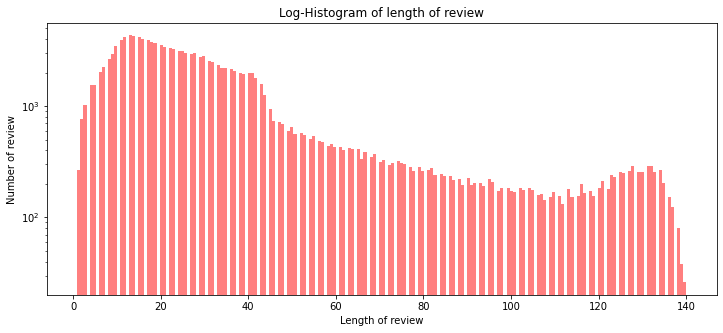

In [32]:
# 전체 데이터의 리뷰 길이 히스토그램 그리기

# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))

# 히스토그램 선언
# bins : 히스토그램 값에 대한 버킷 범위
# range : x축 값의 범위
# alpha : 그래프 색상 투명도
# color : 그래프 색상
# label : 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')

# 그래프 제목
plt.title('Log-Histogram of length of review')

# 그래프 x축 라벨
plt.xlabel('Length of review')

# 그래프 y축 라벨
plt.ylabel('Number of review')

In [33]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))

# 사분위에 대한 경우 0~100 스케일로 되어 있음
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 140
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 33.08
리뷰 길이 표준편차: 27.94
리뷰 길이 중간값: 25.0
리뷰 길이 제1사분위: 15.0
리뷰 길이 제3사분위: 40.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f5ba0675160>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5ba0675940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5ba0602400>],
 'means': [<matplotlib.lines.Line2D at 0x7f5ba0602208>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5ba0675ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5ba06753c8>,
  <matplotlib.lines.Line2D at 0x7f5ba0675630>]}

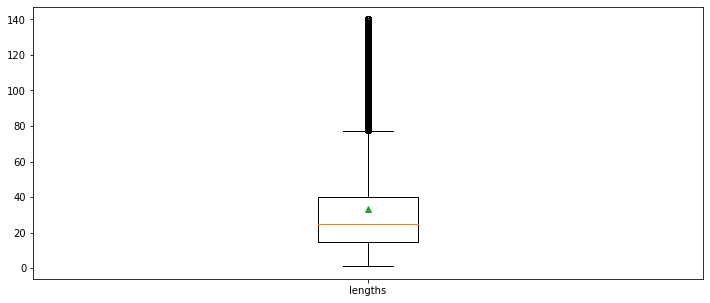

In [34]:
plt.figure(figsize=(12,5))

# 박스 플롯 생성
# 첫 번째 파라미터: 여러 분포에 대한 데이터 리스트를 입력
# labels : 입력한 데이터에 대한 라벨
# shomeans : 평균값을 마크함
plt.boxplot(train_length,
           labels=['lengths'],
           showmeans=True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


Text(0, 0.5, 'Number of reviews')

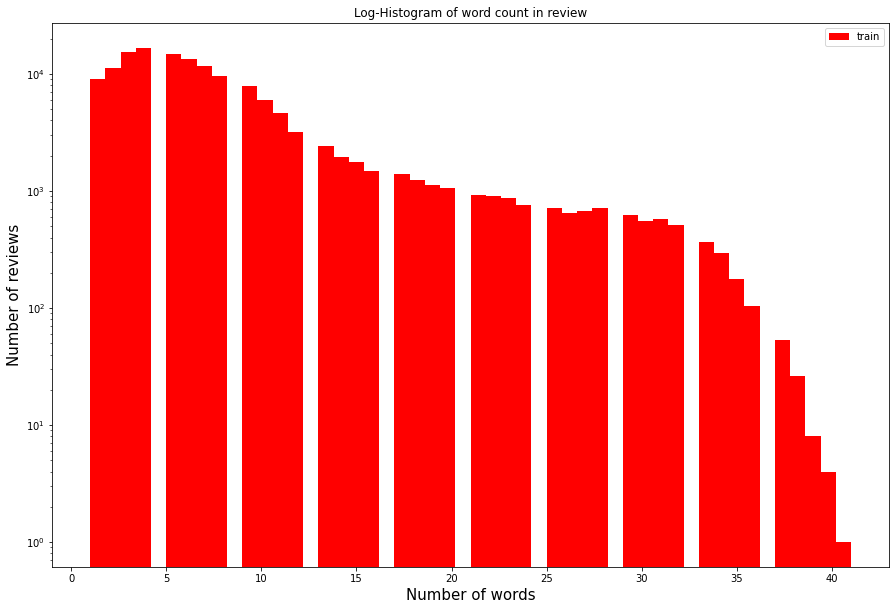

In [35]:
train_word_counts = train_data['document'].astype(str) \
                    .apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review')
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [36]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))

# 사분위에 대한 경우 0~100 스케일로 되어 있음
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 41
리뷰 단어 개수 최솟값: 1
리뷰 단어 개수 평균값: 7.76
리뷰 단어 개수 표준편차: 6.52
리뷰 단어 개수 중간값: 6.0
리뷰 단어 개수 제1사분위: 4.0
리뷰 단어 개수 제3사분위: 9.0


## 1-3) 토큰화

In [37]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', 
           stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [38]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를',
             '으로','자','에','와','한','하다']

In [39]:
X_train = []
for sentence in train_data['document']:
    # 토큰화
    temp_X = okt.morphs(sentence, stem=True) 
    
    # 불용어 제거
    temp_X = [word for word in temp_X if not word in stopwords] 
    X_train.append(temp_X)

In [40]:
X_train[:3]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]

In [41]:
X_test = []
for sentence in test_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

## 1-4) 정수 인코딩

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [43]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [44]:
print(len(tokenizer.word_index))
# print(tokenizer.word_index)

43752


In [45]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", 
      (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43752
등장 빈도가 2번 이하인 희귀 단어의 수: 24337
단어 집합에서 희귀 단어의 비율: 55.62488571950996
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.8715872104872904


In [46]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 19416


In [47]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
x_train = tokenizer.texts_to_sequences(X_train)
x_test = tokenizer.texts_to_sequences(X_test)

In [48]:
print(X_train[3])
print(x_train[3])

['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']
[6492, 105, 8118, 218, 56, 4, 26, 3603]


In [49]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

## 1-5) 빈 샘플(empty samples) 제거

In [50]:
drop_train = [index for index, sentence in enumerate(x_train) 
              if len(sentence) < 1]
print(len(drop_train), drop_train)

231 [28, 414, 1149, 1347, 1572, 1711, 2321, 2345, 2432, 3440, 4289, 4612, 4809, 5021, 5722, 7141, 7790, 9660, 10596, 10973, 11669, 12722, 12766, 12896, 13788, 15427, 16782, 18597, 18626, 19286, 21297, 24351, 24583, 24871, 25031, 25860, 26313, 27110, 27497, 28474, 28600, 28938, 29596, 29618, 30187, 30623, 32218, 32462, 32874, 32885, 33701, 34017, 34216, 34919, 36295, 37099, 37481, 39648, 40010, 40364, 40665, 43207, 43312, 43410, 43838, 43922, 43984, 44094, 44629, 45388, 46359, 46788, 46909, 47456, 47865, 48205, 48827, 51094, 52043, 52778, 52980, 53565, 54640, 54875, 55519, 56274, 56971, 57036, 57277, 57391, 60421, 60439, 60718, 61783, 61949, 62106, 62592, 63085, 63487, 63632, 64232, 64332, 65184, 65481, 66049, 66665, 67697, 67928, 68049, 69478, 70138, 70510, 71315, 72129, 73255, 74008, 74186, 75521, 75921, 77418, 77739, 78027, 78051, 78416, 78887, 79170, 79754, 80550, 80662, 81848, 82858, 84521, 84990, 87275, 87381, 87490, 87497, 88069, 88706, 89022, 89292, 90566, 91144, 92800, 93043, 9

In [51]:
# 빈 샘플들을 제거
x_train = np.delete(x_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(x_train))
print(len(y_train))

145162
145162


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [52]:
x_train[1]

[933, 457, 41, 602, 1, 214, 1449, 24, 961, 675, 19]

## 1-6) 패딩

리뷰의 최대 길이 : 69
리뷰의 평균 길이 : 10.812485361182679


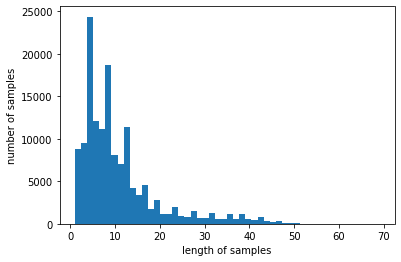

In [53]:
print('리뷰의 최대 길이 :',max(len(l) for l in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [54]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'
          %(max_len, (cnt / len(nested_list))*100))

In [55]:
max_len = 30
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.31944999380003


In [56]:
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [57]:
x_train.shape

(145162, 30)

# 2. LSTM으로 네이버 영화 리뷰 감성 분류하기

In [58]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [59]:
model = Sequential()
model.add(Embedding(vocab_size, 100)) # 임베딩 벡터 차원 : 100
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [60]:
es = EarlyStopping(monitor='val_loss', mode='min', 
                   verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', 
                     mode='max', verbose=1, save_best_only=True)

In [61]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, 
                    callbacks=[es, mc], batch_size=60, 
                    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 116129 samples, validate on 29033 samples
Epoch 1/15
115980/116129 [============================>.] - ETA: 0s - loss: 0.3898 - acc: 0.8218
Epoch 00001: val_acc improved from -inf to 0.84559, saving model to best_model.h5
116129/116129 [==============================] - 33s 280us/sample - loss: 0.3898 - acc: 0.8218 - val_loss: 0.3564 - val_acc: 0.8456
Epoch 2/15
115920/116129 [============================>.] - ETA: 0s - loss: 0.3284 - acc: 0.8573
Epoch 00002: val_acc improved from 0.84559 to 0.85510, saving model to best_model.h5
116129/116129 [==============================] - 32s 275us/sample - loss: 0.3285 - acc: 0.8572 - val_loss: 0.3326 - val_acc: 0.8551
Epoch 3/15
115980/116129 [============================>.] - ETA: 0s - loss: 0.3033 - acc: 0.8707
Epoch 00003: val_acc improved from 0.85510 to 0.86033, saving model to best_model.h5
116129/116129 [==============================] -

In [62]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

48852/48852 - 4s - loss: 0.3450 - acc: 0.8542
[0.3449993022564031, 0.8542127]


In [63]:
# model.compile(optimizer='adam', loss='binary_crossentropy', 
#               metrics=['acc'])
# history = model.fit(x_train, y_train, epochs=15, 
#                     callbacks=[es, mc], batch_size=60, 
#                     validation_split=0.2)

In [64]:
# results = model.evaluate(x_test,  y_test, verbose=2)

# print(results)

# 3. 리뷰 예측하기

In [78]:
def sentiment_predict(model, new_sentence):
    # 토큰화
    new_sentence = okt.morphs(new_sentence, stem=True)
    
    # 불용어 제거
    new_sentence = [word for word in new_sentence 
                            if not word in stopwords] 
    
    # 정수 인코딩
    encoded = tokenizer.texts_to_sequences([new_sentence]) 
    
    # 패딩
    pad_new = pad_sequences(encoded, maxlen = max_len) 
    
    # 예측
    score = float(model.predict(pad_new)) 
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format(
                                    (1 - score) * 100))

In [79]:
sentiment_predict(model, '이 영화 개꿀잼 ㅋㅋㅋ')

91.44% 확률로 긍정 리뷰입니다.



In [80]:
sentiment_predict(model, '이 영화 핵노잼 ㅠㅠ')

94.12% 확률로 부정 리뷰입니다.



In [68]:
sentiment_predict(model, '이딴게 영화냐 ㅉㅉ')

99.62% 확률로 부정 리뷰입니다.



In [69]:
sentiment_predict(model, '감독 뭐하는 놈이냐?')

97.94% 확률로 부정 리뷰입니다.



In [70]:
sentiment_predict(model, '와 개쩐다 정말 세계관 최강자들의 영화다')

81.77% 확률로 긍정 리뷰입니다.



In [71]:
sentiment_predict(model, "시간 아깝다")

98.93% 확률로 부정 리뷰입니다.



In [72]:
sentiment_predict(model, "미쳤다 무대를 찢어놓으셨다")

71.64% 확률로 부정 리뷰입니다.



In [73]:
sentiment_predict(model, '지루하긴 했지만 잘 만들어진 영화임!')

89.90% 확률로 부정 리뷰입니다.



In [74]:
sentiment_predict(model, '완성도는 높지만 지루함')

95.34% 확률로 부정 리뷰입니다.



In [75]:
sentiment_predict(model, '개재밌네;;')

88.72% 확률로 긍정 리뷰입니다.



In [76]:
sentiment_predict(model, '꿀잼')

95.06% 확률로 긍정 리뷰입니다.



In [77]:
sentiment_predict(model, '존잼')

90.86% 확률로 긍정 리뷰입니다.

